In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation




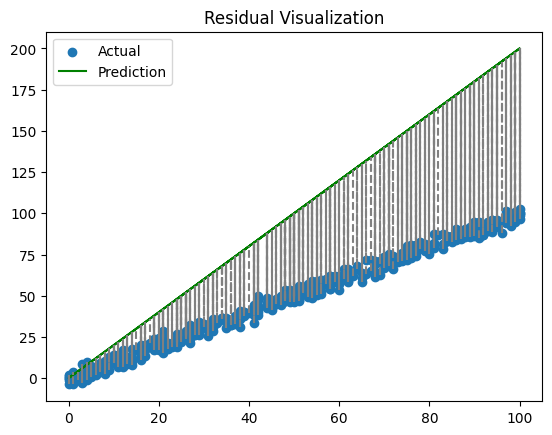

In [ ]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)
data

data = data.dropna()

train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)
x=train_input
y=train_output

preds = 2 * x
errors = y - preds

plt.scatter(x, y, label='Actual')
plt.plot(x, preds, color='green', label='Prediction')

# Draw error lines
for i in range(len(x)):
    plt.plot([x[i],x[i]], [y[i], preds[i]], color='gray', linestyle='--')

plt.title("Residual Visualization")
plt.legend()
plt.show()


In [ ]:
sns.barplot(x=data["x"],y=data["y"])
plt.show()

In [ ]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions-train_output)
        dm = 2 * np.mean(np.multiply(train_input, df))
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        self.loss = []

        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], label='Regression Line')
        ax.scatter(train_input, train_output, marker='o', label='Training Data')

        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            predictions = self.forward_propagation(train_input)

            cost = self.cost_function(predictions, train_output)

            derivatives = self.backward_propagation(
                train_input, train_output, predictions)

            self.update_parameters(derivatives, learning_rate)

            line.set_ydata(self.parameters['m']
                        * x_vals + self.parameters['c'])

            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))

            return line,
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)

        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss


Iteration = 1, Loss = 10111.797639777027
Iteration = 1, Loss = 1225.546973993525
Iteration = 1, Loss = 154.65705391259792
Iteration = 1, Loss = 25.603155635850946
Iteration = 2, Loss = 10.050747672492376
Iteration = 3, Loss = 8.176504491379252
Iteration = 4, Loss = 7.95062902228365
Iteration = 5, Loss = 7.923399802001775
Iteration = 6, Loss = 7.920109617385713
Iteration = 7, Loss = 7.919704347971126
Iteration = 8, Loss = 7.919646743117052
Iteration = 9, Loss = 7.919631036509117
Iteration = 10, Loss = 7.9196203799788
Iteration = 11, Loss = 7.919610332920694
Iteration = 12, Loss = 7.919600360193439
Iteration = 13, Loss = 7.9195903973065835
Iteration = 14, Loss = 7.919580436488246
Iteration = 15, Loss = 7.919570476801727
Iteration = 16, Loss = 7.919560518134069
Iteration = 17, Loss = 7.9195505604715635
Iteration = 18, Loss = 7.919540603812469
Iteration = 19, Loss = 7.919530648156491
Iteration = 20, Loss = 7.919520693503504


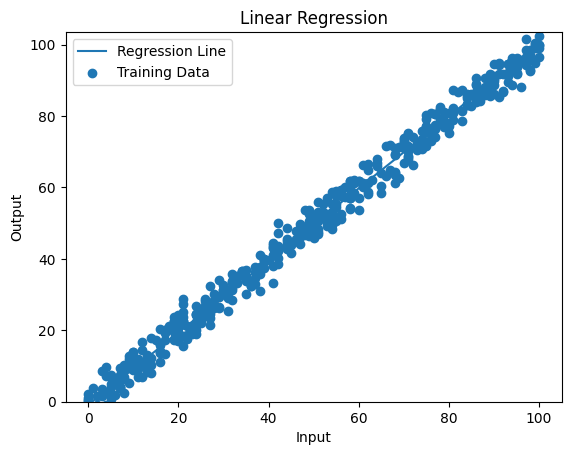

In [ ]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)
